# Get Started

[Contrails API](https://api.contrails.org) is a RESTful API that provides contrail modeling and mitigation tools.

This notebook shows basic usage of Contrails API from a [Python notebook](https://jupyter.org/) using the [requests](https://pypi.org/project/requests/) package to send HTTP requests.

You can interact with Contrails API with any HTTP compatible client (i.e. [curl](https://curl.se/), [Postman](https://www.postman.com/product/tools/)).

## Authorization

- Your API key must be provided in `x-api-key` request header.
- In this notebook, we pluck it from a preset environment variable.
- Similarly, we parametrize the URL endpoint as an environment variable. The API base url is `https://api.contrails.org`.
- Contact [api@contrails.org](mailto:api@contrails.org) to request a user account.

In [1]:
import os
from pprint import pprint

In [2]:
URL = "https://api.contrails.org"
API_KEY = os.environ["CONTRAILS_API_KEY"]
HEADERS = {"x-api-key": API_KEY}

## Research API (`/v0`)

The Research API (`/v0/trajectory`, `v0/grid`) provides hosted versions of [pycontrails](https://py.contrails.org) models run with re-analysis and forecast meteorology provided by ECMWF.

See the [Research API /v0](research_api.html) notebook for details on calculating model outputs on flight trajectories and meteorology grids.

In [3]:
import matplotlib.pyplot as plt  # pip install matplotlib
import numpy as np  # pip install numpy
import pandas as pd  # pip install pandas

In [4]:
n_waypoints = 100
t0 = "2022-06-07T00:15:00"
t1 = "2022-06-07T02:30:00"

flight = {
    "longitude": np.linspace(-29, -50, n_waypoints).tolist(),
    "latitude": np.linspace(45, 42, n_waypoints).tolist(),
    "altitude": np.linspace(33000, 38000, n_waypoints).tolist(),
    "time": pd.date_range(t0, t1, periods=n_waypoints).astype(str).tolist(),
    "engine_efficiency": np.random.default_rng(42).uniform(0.2, 0.4, n_waypoints).tolist(),
    "aircraft_mass": np.linspace(65000, 62000, n_waypoints).tolist(),
    "aircraft_type": "A320",
}

In [5]:
import requests

r = requests.post(f"{URL}/v0/trajectory/sac", json=flight, headers=HEADERS)
print(f"HTTP Response Code: {r.status_code} {r.reason}\n")

r_json = r.json()
for k, v in r_json.items():
    print(f"{k}: {v}")

HTTP Response Code: 200 OK

flight_id: 1732208899718050
met_source_provider: ECMWF
met_source_dataset: ERA5
met_source_product: reanalysis
pycontrails_version: 0.52.1
humidity_scaling_name: histogram_matching
humidity_scaling_formula: era5_quantiles -> iagos_quantiles
sac: [1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


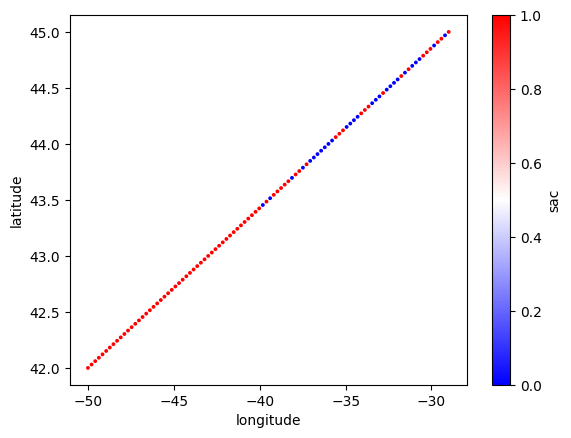

In [6]:
flight_df = pd.DataFrame(flight).assign(sac=r_json["sac"])
flight_df.plot.scatter(x="longitude", y="latitude", c="sac", cmap="bwr", s=3);

In [7]:
r = requests.post(f"{URL}/v0/trajectory/issr", json=flight, headers=HEADERS)
print(f"HTTP Response Code: {r.status_code} {r.reason}\n")

r_json = r.json()
for k, v in r_json.items():
    print(f"{k}: {v}")

HTTP Response Code: 200 OK

flight_id: 1732208904445308
met_source_provider: ECMWF
met_source_dataset: ERA5
met_source_product: reanalysis
pycontrails_version: 0.52.1
humidity_scaling_name: histogram_matching
humidity_scaling_formula: era5_quantiles -> iagos_quantiles
issr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [8]:
flight_df["issr"] = r_json["issr"]
flight_df.plot.scatter(x="longitude", y="latitude", c="issr", cmap="bwr", s=1);

In [9]:
r = requests.post(f"{URL}/v0/trajectory/cocip", json=flight, headers=HEADERS)
print(f"HTTP Response Code: {r.status_code} {r.reason}\n")
r_json = r.json()

# The /trajectory/cocip endpoint includes many fields in the response.
for k, v in r_json.items():
    v = str(v)
    if len(v) > 80:
        v = v[:77] + "..."
    print(f"{k}: {v}")

HTTP Response Code: 200 OK

cocip_max_contrail_age: 12 hours
cocip_dt_integration: 10 minutes
flight_id: 1732208906070747
met_source_provider: ECMWF
met_source_dataset: ERA5
met_source_product: reanalysis
pycontrails_version: 0.52.1
nvpm_data_source: ICAO EDB
engine_uid: 01P08CM105
humidity_scaling_name: histogram_matching
humidity_scaling_formula: era5_quantiles -> iagos_quantiles
sac: [1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0...
nox_ei: [0.0076, 0.0076, 0.0076, 0.0076, 0.0076, 0.0076, 0.0076, 0.0076, 0.0076, 0.00...
nvpm_ei_n: [647000000000000.0, 647000000000000.0, 648000000000000.0, 649000000000000.0, ...
energy_forcing: [0.0, 0.0, 680000000000.0, 0.0, 0.0, 790000000000.0, 540000000000.0, 0.0, 0.0...
contrail_age: [0.0, 0.0, 112.0, 0.0, 0.0, 128.0, 127.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
initially_persistent: [1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0...


In [10]:
# Energy forcing is the primary model output.
ef = np.array(r_json["energy_forcing"], dtype=float)
ef

array([0.00e+00, 0.00e+00, 6.80e+11, 0.00e+00, 0.00e+00, 7.90e+11,
       5.40e+11, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 6.10e+11, 5.40e+11,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 2.90e+11, 1.74e+12, 1.32e+12, 1.68e+12,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 2.92e+12, 2.54e+12,
       1.51e+12, 1.03e+12, 6.30e+11, 1.90e+11, 8.00e+10, 5.00e+10,
       5.00e+10, 6.00e+10, 6.00e+10, 7.00e+10, 1.20e+11, 1.50e+11,
       1.90e+11, 2.10e+11, 1.90e+11, 1.40e+11, 9.00e+10, 6.00e+10,
       2.00e+10, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e

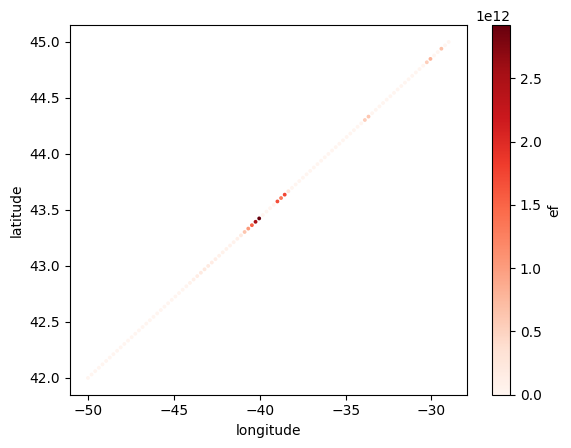

In [11]:
flight_df["ef"] = ef
flight_df.plot.scatter(x="longitude", y="latitude", c="ef", cmap="Reds", s=3);

In [12]:
r = requests.post(f"{URL}/v0/trajectory/emissions", json=flight, headers=HEADERS)
print(f"HTTP Response Code: {r.status_code} {r.reason}\n")

r_json = r.json()
for k, v in r_json.items():
    v = str(v)
    if len(v) > 80:
        v = v[:77] + "..."
    print(f"{k}: {v}")

HTTP Response Code: 200 OK

flight_id: 1732208928844505
met_source_provider: ECMWF
met_source_dataset: ERA5
met_source_product: reanalysis
pycontrails_version: 0.52.1
nvpm_data_source: ICAO EDB
engine_uid: 01P08CM105
humidity_scaling_name: histogram_matching
humidity_scaling_formula: era5_quantiles -> iagos_quantiles
nox_ei: [0.0076, 0.0076, 0.0076, 0.0076, 0.0076, 0.0076, 0.0076, 0.0076, 0.0076, 0.00...
nvpm_ei_n: [647000000000000.0, 647000000000000.0, 648000000000000.0, 649000000000000.0, ...


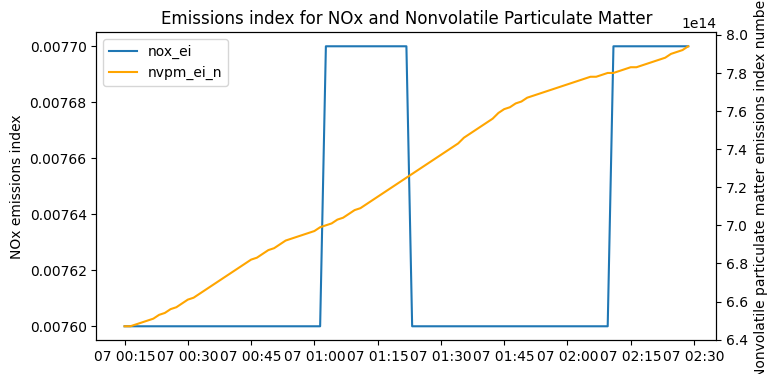

In [13]:
time = pd.to_datetime(flight["time"])

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(time, r_json["nox_ei"], label="nox_ei")

ax2 = ax.twinx()
ax2.plot(time, r_json["nvpm_ei_n"], color="orange", label="nvpm_ei_n")

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc=0)

ax.set_ylabel("NOx emissions index")
ax2.set_ylabel("Nonvolatile particulate matter emissions index number")
ax.set_title("Emissions index for NOx and Nonvolatile Particulate Matter");

### Data Availability

**GET [/v0/grid/availability](https://api.contrails.org/openapi#/Grid/grid_data_availability_v0_grid_availability_get)**

Grid endpoints in Contrails API serve data with varying availability. The `/v0/grid/availability` endpoint gives a range of times for which each `/grid` endpoint serves data.

In [14]:
r = requests.get(f"{URL}/v0/grid/availability", headers=HEADERS)

print(f"HTTP Response Code: {r.status_code} {r.reason}")
pprint(r.json())

HTTP Response Code: 200 OK
{'cocip': ['2022-01-01T00:00:00Z', '2024-11-22T17:00:00Z'],
 'issr': ['2018-01-01T00:00:00Z', '2024-11-24T06:00:00Z'],
 'pcr': ['2018-01-01T00:00:00Z', '2024-11-24T06:00:00Z'],
 'sac': ['2018-01-01T00:00:00Z', '2024-11-24T06:00:00Z']}


### SAC, ISSR, PCR

**GET [/v0/grid/sac](https://api.contrails.org/openapi#/Grid/schmidt_appleman_contrail_formation_criteria_v0_grid_sac_get)**

**GET [/v0/grid/issr](https://api.contrails.org/openapi#/Research/ice_super_saturated_regions_v0_grid_issr_get)**

**GET [/v0/grid/pcr](https://api.contrails.org/openapi#/Research/persistent_contrail_regions_v0_grid_pcr_get)**

The SAC, ISSR, and PCR grid endpoints all use similar conventions. 

We demonstrate the SAC grid endpoint here. 
This endpoint accepts an optional `engine_efficiency` parameter that takes a default value of 0.3.

In [15]:
import xarray as xr  # pip install xarray

In [16]:
time = "2022-06-07T02"
bbox = "-50,0,50,50"
params = {"time": time, "bbox": bbox, "engine_efficiency": 0.32}
r = requests.get(f"{URL}/v0/grid/sac", headers=HEADERS, params=params)
print(f"HTTP Response Code: {r.status_code} {r.reason}")
print(f"Response content-type: {r.headers['content-type']}")

HTTP Response Code: 200 OK
Response content-type: application/netcdf


#### netCDF Response Format

The default response format is netCDF. For the SAC endpoint, the 4D grid holds a single `sac` variable. The response can be written out and read with `xarray`.

In [17]:
with open("sac.nc", "wb") as f:
    f.write(r.content)

da = xr.open_dataarray("sac.nc", engine="netcdf4")  # pip install netCDF4
da.coords  # each netCDF served in the API is a 4D grid

Coordinates:
  * time          (time) datetime64[ns] 8B 2022-06-07T02:00:00
  * flight_level  (flight_level) int32 72B 270 280 290 300 ... 410 420 430 440
  * longitude     (longitude) float32 2kB -50.0 -49.75 -49.5 ... 49.5 49.75 50.0
  * latitude      (latitude) float32 804B 0.0 0.25 0.5 0.75 ... 49.5 49.75 50.0

In [18]:
# The grid contains 18 flight levels ranging from 270 to 440.
da.flight_level.values

array([270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440], dtype=int32)

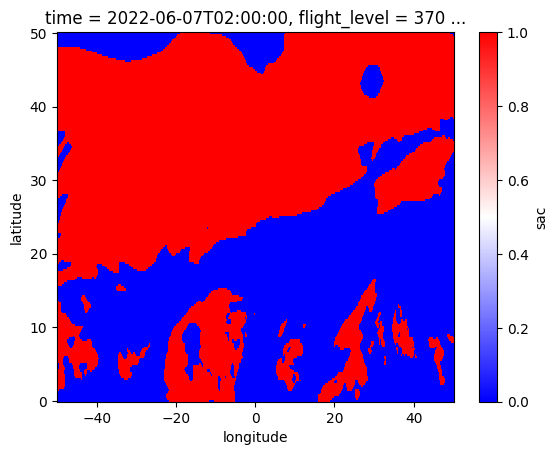

In [19]:
# We "squeeze" on time and select a single flight level to plot.
da.squeeze("time").isel(flight_level=10).plot(x="longitude", y="latitude", cmap="bwr");

#### GeoJSON Response Format

Contrails API supports two types of polygon formats: [GeoJSON](https://geojson.org/) and [KML](https://developers.google.com/kml/documentation/kml_tut).

We demonstrate the same grid endpoint using the GeoJSON representation here.

See the [polygon documentation](polygons.html) for additional examples including custom polygon simplification.

In [20]:
params["format"] = "geojson"
r = requests.get(f"{URL}/v0/grid/sac", headers=HEADERS, params=params)

print(f"HTTP Response Code: {r.status_code} {r.reason}")
print(f"Response content-type: {r.headers['content-type']}")

r_json = r.json()

HTTP Response Code: 200 OK
Response content-type: application/json


In [21]:
import shapely.geometry as sgeom  # pip install shapely

GeoJSON type: FeatureCollection
{'description': 'Schmidt-Appleman contrail formation criteria',
 'engine_efficiency': 0.32,
 'humidity_scaling_formula': 'era5_quantiles -> iagos_quantiles',
 'humidity_scaling_name': 'histogram_matching',
 'level': 350,
 'level_long_name': 'Flight Level',
 'level_standard_name': 'FL',
 'level_units': 'hectofeet',
 'met_source_dataset': 'ERA5',
 'met_source_product': 'reanalysis',
 'met_source_provider': 'ECMWF',
 'name': 'sac',
 'polygon_iso_value': 0.5,
 'pycontrails_version': '0.52.1',
 'time': '2022-06-07T02:00:00Z'}


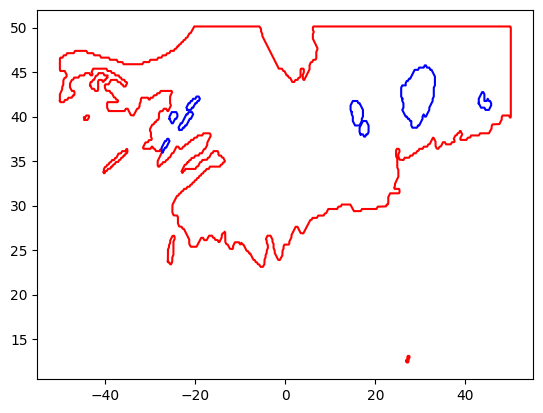

In [22]:
# The response body is a GeoJSON FeatureCollection. Each feature contains polygons for each flight level.
print(f"GeoJSON type: {r_json['type']}")

# Extract a feature
feature = r_json["features"][8]
pprint(feature["properties"])  # print out the metadata

# Visualize with shapely
# Polygons can have both exterior and interior rings
polygons = sgeom.shape(feature["geometry"])
for poly in polygons.geoms:
    plt.plot(*poly.exterior.xy, color="red")  # color exterior red
    for interior in poly.interiors:
        plt.plot(*interior.xy, color="blue")  # and interior blue

### CoCiP

> The `v0/grid/cocip` endpoint is designed for research purposes.
> Please use the [/v1 Contrail Forecast API](forecast_api.html) to design production use cases (e.g. trials, flight planning, air traffic management) moving forward.

**GET [/v0/grid/cocip](https://api.contrails.org/openapi#/Grid/contrail_cirrus_predictions_v0_grid_cocip_get)**

The **gridded CoCiP** model ([Engberg et al 2024](https://egusphere.copernicus.org/preprints/2024/egusphere-2024-1361/)) is an abstraction of the [**original CoCiP** model](https://gmd.copernicus.org/articles/5/543/2012/) . Instead of working with a single flight trajectory, the gridded version starts with a 4D vector field of trajectory segments each assumed to be in a nominal cruising state. The gridded model then evolves the segments over time using the same rules as the classical model.

Given a fixed trajectory, the original CoCiP model gives a precise prediction of contrail climate forcing resulting from that trajectory. Consequently, the `/v0/trajectory/cocip` endpoint should be favored when evaluating contrail forcing of a single flight. On the other hand, the gridded CoCiP model can be used to optimize an unknown trajectory over a 4D grid. The two models widely agree when a flight is in a nominal cruising state.

The `/v0/grid/cocip` endpoints requires an `aircraft_type` query parameter for CoCiP initialization.

Unlike all other endpoints, the model underpinning the `/v0/grid/cocip` endpoint has been precomputed. Only a limited set of 11 aircraft types are currently available.

- A320
- A20N
- A321
- A319
- A21N
- A333
- A350
- B737
- B738
- B789
- B77W


#### netCDF Response Format

In [23]:
params["aircraft_type"] = "A320"
params["format"] = "netcdf"

r = requests.get(f"{URL}/v0/grid/cocip", params=params, headers=HEADERS)
print(f"HTTP Response Code: {r.status_code} {r.reason}")
print(f"Content type: {r.headers['content-type']}")

HTTP Response Code: 200 OK
Content type: application/netcdf


In [24]:
with open("cocipgrid.nc", "wb") as f:
    f.write(r.content)

ds = xr.open_dataset("cocipgrid.nc", engine="netcdf4")
ds.data_vars  # The CoCiP data comes with both energy forcing and contrail age

Data variables:
    ef_per_m      (longitude, latitude, flight_level, time) float32 6MB ...
    contrail_age  (longitude, latitude, flight_level, time) timedelta64[ns] 12MB ...

{'aircraft_type': 'A320',
 'cocip_dt_integration': '5 minutes',
 'cocip_max_contrail_age': '12 hours',
 'humidity_scaling_formula': 'rhi -> (rhi / rhi_adj) ^ rhi_boost_exponent',
 'humidity_scaling_name': 'exponential_boost_latitude_customization',
 'long_name': 'Energy forcing per meter of flight trajectory',
 'met_source_dataset': 'ERA5',
 'met_source_product': 'reanalysis',
 'met_source_provider': 'ECMWF',
 'name': 'cocip',
 'pycontrails_version': '0.32.2',
 'units': 'J / m'}


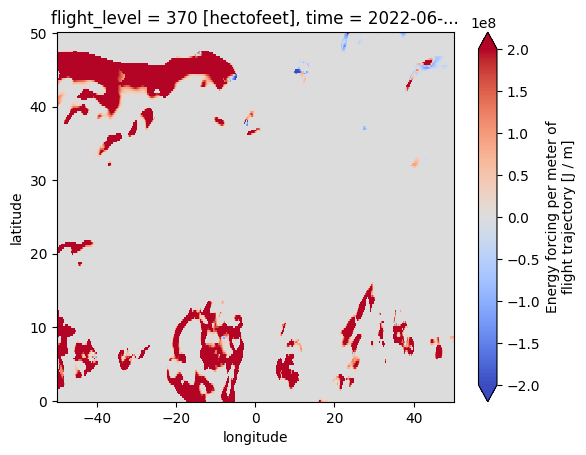

In [25]:
# The energy forcing variable is the primary model output.
da = ds["ef_per_m"]

# Print some metadata present in the netCDF
pprint(ds.attrs | da.attrs)

# We "squeeze" on time and select a single flight level to plot.
da.squeeze("time").isel(flight_level=10).plot(
    x="longitude", y="latitude", vmin=-2e8, vmax=2e8, cmap="coolwarm"
);

#### GeoJSON Response Format

We can specify an energy forcing `threshold` parameter when calling the endpoint. The response contains just polygons surrounding grid cells at which the `ef_per_m` exceeds the threshold.

In converting from the grid representation to the polygon representation, we exclude degenerate polygons and polygons whose area is doesn't exceeds some minimal threshold. Excluding these edge cases allows us to focus on regions of high impact. See the [polygon documentation](https://apidocs.contrails.org/notebooks/polygons.html) for additional polygon simplification examples.

In [26]:
params["format"] = "geojson"
params["threshold"] = 2e8
r = requests.get(f"{URL}/v0/grid/cocip", headers=HEADERS, params=params)

print(f"HTTP Response Code: {r.status_code} {r.reason}")
print(f"Response content-type: {r.headers['content-type']}")
r_json = r.json()

HTTP Response Code: 200 OK
Response content-type: application/json


{'aircraft_type': 'A320',
 'cocip_dt_integration': '5 minutes',
 'cocip_max_contrail_age': '12 hours',
 'humidity_scaling_formula': 'rhi -> (rhi / rhi_adj) ^ rhi_boost_exponent',
 'humidity_scaling_name': 'exponential_boost_latitude_customization',
 'level': 370,
 'level_long_name': 'Flight Level',
 'level_standard_name': 'FL',
 'level_units': 'hectofeet',
 'long_name': 'Energy forcing per meter of flight trajectory',
 'met_source_dataset': 'ERA5',
 'met_source_product': 'reanalysis',
 'met_source_provider': 'ECMWF',
 'name': 'ef_per_m',
 'polygon_iso_value': 200000000.0,
 'pycontrails_version': '0.32.2',
 'time': '2022-06-07T02:00:00Z',
 'units': 'J / m'}


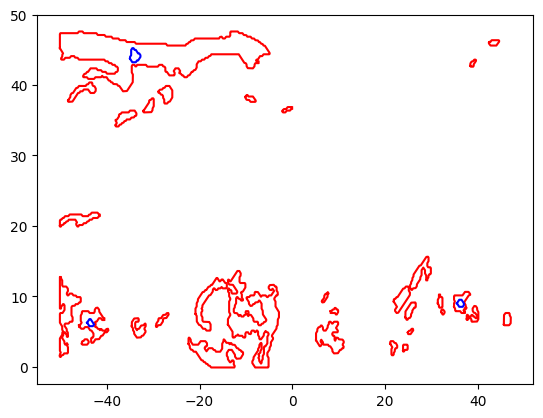

In [27]:
# Extract a feature
feature = r_json["features"][10]
pprint(feature["properties"])  # print out the metadata

# Visualize. We see polygons around regions of dark red in the previous plot.
polygons = sgeom.shape(feature["geometry"])
for poly in polygons.geoms:
    plt.plot(*poly.exterior.xy, color="red")  # color exterior red
    for interior in poly.interiors:
        plt.plot(*interior.xy, color="blue")  # and interior blue

**Cleanup**

In [28]:
os.remove("sac.nc")
os.remove("cocipgrid.nc")

In [4]:
import matplotlib.pyplot as plt  # pip install matplotlib
import numpy as np  # pip install numpy
import pandas as pd  # pip install pandas

In [5]:
# create an example flight input
n_waypoints = 100
t0 = "2022-06-07T00:15:00"
t1 = "2022-06-07T02:30:00"

flight = {
    "longitude": np.linspace(-29, -50, n_waypoints).tolist(),
    "latitude": np.linspace(45, 42, n_waypoints).tolist(),
    "altitude": np.linspace(33000, 38000, n_waypoints).tolist(),
    "time": pd.date_range(t0, t1, periods=n_waypoints).astype(str).tolist(),
    "engine_efficiency": np.random.default_rng(42).uniform(0.2, 0.4, n_waypoints).tolist(),
    "aircraft_mass": np.linspace(65000, 62000, n_waypoints).tolist(),
    "aircraft_type": "A320",
}

In [12]:
import requests  # pip install requests

# calculate the Schmidt-Appleman Criterion along the flight trajectory
r = requests.post(f"{URL}/v0/trajectory/sac", json=flight, headers=HEADERS)
print(f"HTTP Response Code: {r.status_code} {r.reason}\n")

# print out response
r_json = r.json()
for key, value in r_json.items():
    print(f"{key}: {value}")

HTTP Response Code: 200 OK

flight_id: 1738963287010274
met_source_provider: ECMWF
met_source_dataset: ERA5
met_source_product: reanalysis
pycontrails_version: 0.54.5
humidity_scaling_name: histogram_matching
humidity_scaling_formula: era5_quantiles -> iagos_quantiles
sac: [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


## Forecast APIs

The Contrail Forecast APIs (`/v1/grids`, `/v1/regions`) implements a [working specification for contrail forecast data](https://contrailcirrus.github.io/contrail-forecast/) designed for air traffic planners and managers implementing navigational contrail avoidance systems.

The data served from this endpoint contains contrail forcing scaled to a categorical index [0 - 4], with 0 representing no contrail harm and 4 representing the most harmful contrail forming regions.

See the [Contrail Forecast /v1](forecast_api.html) notebook for details on accessing forecast data in netCDF and GeoJSON formats.

In [16]:
import xarray as xr  # pip install xarray

In [17]:
# fetch netCDF forecast
params = {
    "time": "2024-10-15T12",  # format ISO 8601 (UTC)
    "aircraft_class": "default",
    "flight_level": 330,
}

resp = requests.get(f"{URL}/v1/grids", params=params, headers=HEADERS)
print(f"HTTP Response Code: {resp.status_code} {resp.reason}\n")

# Save request to disk, then open with xarray
with open("forecast.nc", "wb") as f:
    f.write(resp.content)

ds = xr.open_dataset("forecast.nc", engine="netcdf4")  # pip install netCDF4

HTTP Response Code: 200 OK



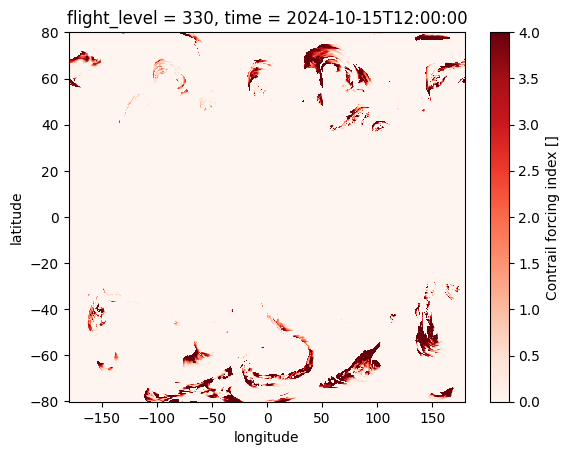

In [18]:
# Plot lat x lon slice for this time x flight level
ds["contrails"].squeeze().plot(x="longitude", y="latitude", cmap="Reds");

## ADS-B APIs 

The ADS-B APIs (`v1/adsb/`) enables authorized users to access common ADS-B telemetry for contrails research purposes.

The underlying ADS-B data is provided by [Spire Aviation](https://aviation-docs.spire.com/).

See the [Contrails ADS-B Access](adsb_api.html) notebook for details on searching and downloading ADS-B data.

In [ ]:
import requests  # pip install requests
import matplotlib.pyplot as plt  # pip install matplotlib
import pandas as pd  # pip install pandas

In [ ]:
params = {
    "date": "2025-01-24T02"  # ISO 8601 (UTC)
}

r = requests.get(f"{URL}/v1/adsb/telemetry", params=params, headers=HEADERS)
print(f"HTTP Response Code: {r.status_code} {r.reason}\n")

# write out response content as parquet file
with open(f"{params['date']}.pq", "wb") as f:
    f.write(r.content)

In [ ]:
# read parquet file with pandas
df = pd.read_parquet(f"{params['date']}.pq")

print("Number of unique flights:", df["flight_id"].nunique())
print("Number of unique waypoints:", len(df["flight_id"]))

df.head()